Name(s) = Rohan Vanaparthi and Arsal Shaikh

Dataset: Electric Vehicle Charging Patterns

Source: Kaggle

Notes to Grader: We decided to omit the database/SQL component from our project. Instead, each of us completed Lab 4.

---

1. Data Collection and Preprocessing

In [1]:
import pandas as pd
import numpy as np

# Load data into data frame
df = pd.read_csv('ev_charging_patterns.csv')


In [2]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

In [3]:
df.head

<bound method NDFrame.head of         User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0        User_1        BMW i3              108.463007         Station_391   
1        User_2  Hyundai Kona              100.000000         Station_428   
2        User_3    Chevy Bolt               75.000000         Station_181   
3        User_4  Hyundai Kona               50.000000         Station_327   
4        User_5  Hyundai Kona               50.000000         Station_108   
...         ...           ...                     ...                 ...   
1315  User_1316   Nissan Leaf              100.000000          Station_57   
1316  User_1317        BMW i3              100.000000          Station_40   
1317  User_1318   Nissan Leaf              100.000000         Station_374   
1318  User_1319    Chevy Bolt               85.000000         Station_336   
1319  User_1320   Nissan Leaf              120.447195         Station_128   

     Charging Station Location  Charging Star

In [4]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


Cleaning Strategy:
1: We found 5% of rows do not have data for energy consumed. 5% of rows do not have data charging rate. 5% of rows  do not have data for distance driven. We will drop these rows since these data points are important for model training later on. Imputing missing values (e.g., using mean or median) could skew the data and introduce inaccuracies, especially in cases where the missing values do not follow the same distribution as the rest of the data.
2: Identify outliers in certain columns using z-score approach. Z-scores standardize the data, making it easy to identify values far from the mean. Using a threshold (e.g., |z| > 3) is a commonly accepted approach for detecting statistical outliers in normally distributed data. We decided narrowed in on columns that were  quantitative in nature and would impact the ML linear regression model in future part of our project. 

 We will do this for the following columns:
1. Battery Capacity
2. Energy Consumed
3. Charging Duration
4. Distance Driven (since last charge)
5. Vehicle Age

In [5]:
totalRows  = df.shape[0]

nan_ratio_1 = df['Vehicle Model'].isnull().sum()
nan_ratio_2 = df['Battery Capacity (kWh)'].isnull().sum()
nan_ratio_3 = df['Charging Station ID'].isnull().sum()
nan_ratio_4 = df['Charging Station Location'].isnull().sum()
nan_ratio_5 = df['Charging Start Time'].isnull().sum()
nan_ratio_6 = df['Charging End Time'].isnull().sum()
nan_ratio_7 = df['Energy Consumed (kWh)'].isnull().sum()
nan_ratio_8 = df['Charging Duration (hours)'].isnull().sum()
nan_ratio_9 = df['Charging Rate (kW)'].isnull().sum()
nan_ratio_10 = df['Charging Cost (USD)'].isnull().sum()
nan_ratio_11 = df['Time of Day'].isnull().sum()
nan_ratio_12 = df['Day of Week'].isnull().sum()
nan_ratio_13 = df['State of Charge (Start %)'].isnull().sum()
nan_ratio_14 = df['State of Charge (End %)'].isnull().sum()
nan_ratio_15 = df['Distance Driven (since last charge) (km)'].isnull().sum()
nan_ratio_16 = df['Temperature (°C)'].isnull().sum()
nan_ratio_17 = df['Vehicle Age (years)'].isnull().sum()
nan_ratio_19 = df['User Type'].isnull().sum()
nan_ratio_20 = df['User ID'].isnull().sum()

print("\n")
print("% of Values Missing for User ID:", (nan_ratio_20/totalRows)*100, "%")
print("% of Values Missing for Vehicle Model:", (nan_ratio_1/totalRows)*100, "%")
print("% of Values Missing for Battery Capacity (kWh):", (nan_ratio_2/totalRows)*100, "%")
print("% of Values Missing for Charging Station ID:", (nan_ratio_3/totalRows)*100, "%")
print("% of Values Missing for Charging Station Location:", (nan_ratio_4/totalRows)*100, "%")
print("% of Values Missing for Charging Start Time:", (nan_ratio_5/totalRows)*100, "%")
print("% of Values Missing for Charging End Time:", (nan_ratio_6/totalRows)*100, "%")
print("% of Values Missing for Energy Consumed (kWh):", (nan_ratio_7/totalRows)*100, "%")
print("% of Values Missing for Charging Duration (hours):", (nan_ratio_8/totalRows)*100, "%")
print("% of Values Missing for Charging Rate (kW):", (nan_ratio_9/totalRows)*100, "%")
print("% of Values Missing for Charging Cost (USD):", (nan_ratio_10/totalRows)*100, "%")
print("% of Values Missing for Time of Day:", (nan_ratio_11/totalRows)*100, "%")
print("% of Values Missing for Day of Week:", (nan_ratio_12/totalRows)*100, "%")
print("% of Values Missing for State of Charge (Start %):", (nan_ratio_13/totalRows)*100, "%")
print("% of Values Missing for State of Charge (End %):", (nan_ratio_14/totalRows)*100, "%")
print("% of Values Missing for Distance Driven (since last charge) (km):", (nan_ratio_15/totalRows)*100, "%")
print("% of Values Missing for Temperature (°C):", (nan_ratio_16/totalRows)*100, "%")
print("% of Values Missing for Vehicle Age (years):", (nan_ratio_17/totalRows)*100, "%")
print("% of Values Missing for User Type:", (nan_ratio_19/totalRows)*100, "%")

# Drop rows that have NaN value
df = df.dropna()



% of Values Missing for User ID: 0.0 %
% of Values Missing for Vehicle Model: 0.0 %
% of Values Missing for Battery Capacity (kWh): 0.0 %
% of Values Missing for Charging Station ID: 0.0 %
% of Values Missing for Charging Station Location: 0.0 %
% of Values Missing for Charging Start Time: 0.0 %
% of Values Missing for Charging End Time: 0.0 %
% of Values Missing for Energy Consumed (kWh): 5.0 %
% of Values Missing for Charging Duration (hours): 0.0 %
% of Values Missing for Charging Rate (kW): 5.0 %
% of Values Missing for Charging Cost (USD): 0.0 %
% of Values Missing for Time of Day: 0.0 %
% of Values Missing for Day of Week: 0.0 %
% of Values Missing for State of Charge (Start %): 0.0 %
% of Values Missing for State of Charge (End %): 0.0 %
% of Values Missing for Distance Driven (since last charge) (km): 5.0 %
% of Values Missing for Temperature (°C): 0.0 %
% of Values Missing for Vehicle Age (years): 0.0 %
% of Values Missing for User Type: 0.0 %


In [6]:

mean_batterycapacity = df['Battery Capacity (kWh)'].mean()
std_batterycapacity = df['Battery Capacity (kWh)'].std()
df['Z-Score Battery Capacity (kWh)'] = abs((df['Battery Capacity (kWh)']-mean_batterycapacity)/std_batterycapacity)

mean_energyconsumed = df['Energy Consumed (kWh)'].mean()
std_energyconsumed = df['Energy Consumed (kWh)'].std()
df['Z-Score Energy Consumed (kWh)'] = abs((df['Energy Consumed (kWh)']-mean_energyconsumed)/std_energyconsumed)

mean_chargingduration = df['Charging Duration (hours)'].mean()
std_chargingduration = df['Charging Duration (hours)'].std()
df['Z-Score Charging Duration (hours)'] = abs((df['Charging Duration (hours)']-mean_chargingduration)/std_chargingduration)

mean_distancedriven = df['Distance Driven (since last charge) (km)'].mean()
std_distancedriven = df['Distance Driven (since last charge) (km)'].std()
df['Z-Score Distance Driven (since last charge) (km)'] = abs((df['Distance Driven (since last charge) (km)']-mean_distancedriven)/std_distancedriven)

mean_vehicleage = df['Vehicle Age (years)'].mean()
std_vehicleage = df['Vehicle Age (years)'].std()
df['Z-Score Vehicle Age (years)'] = abs((df['Vehicle Age (years)']-mean_vehicleage)/std_vehicleage)

old_size = df.shape[0]
df = df[df['Z-Score Battery Capacity (kWh)'] <= 3]
df = df[df['Z-Score Energy Consumed (kWh)'] <= 3]
df = df[df['Z-Score Charging Duration (hours)'] <= 3]
df = df[df['Z-Score Distance Driven (since last charge) (km)'] <= 3]
df = df[df['Z-Score Vehicle Age (years)'] <= 3]

new_size = df.shape[0]

print("We have effectively removed", old_size-new_size, "rows that had z-scores above 3. I took the absolute value of the z-scores so it accounts for any z-score less than -3 as well")


We have effectively removed 27 rows that had z-scores above 3. I took the absolute value of the z-scores so it accounts for any z-score less than -3 as well


/tmp/ipykernel_1816204/2020628801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-Score Battery Capacity (kWh)'] = abs((df['Battery Capacity (kWh)']-mean_batterycapacity)/std_batterycapacity)
/tmp/ipykernel_1816204/2020628801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-Score Energy Consumed (kWh)'] = abs((df['Energy Consumed (kWh)']-mean_energyconsumed)/std_energyconsumed)
/tmp/ipykernel_1816204/2020628801.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Produce some descriptive analytics on the data: Average Charging Duration, Average Cost per kWh, Average Energy Consumed, Average Battery Capacity

In [7]:
# average charging duration
average_duration = df['Charging Duration (hours)'].mean()
print("The average charging duration is", round(average_duration,2), "hours")

The average charging duration is 2.27 hours


In [8]:
# average cost per kWh
total_dollar_amount = df['Charging Cost (USD)'].sum()
total_energy = df['Energy Consumed (kWh)'].sum()
avg_cost = total_dollar_amount/total_energy
print("The average cost per kWh is", "$", round(avg_cost,2))

The average cost per kWh is $ 0.53


In [9]:
# average battery capacity
average_capacity = df['Battery Capacity (kWh)'].mean()
print("The battery capacity is", "$", round(average_capacity,2))

The battery capacity is $ 74.28


Group by Day of Week to see to test hypothesis that if Energy Consumed on Weekends (Saturday and Sunday) is greater than the Average Energy Consumed across all other days

In [10]:
average_energy_bydayofweek = df.groupby('Day of Week')['Energy Consumed (kWh)'].mean()
print("\n",average_energy_bydayofweek)


 Day of Week
Friday       43.251848
Monday       41.431245
Saturday     42.951800
Sunday       42.368937
Thursday     42.412817
Tuesday      41.532797
Wednesday    45.171710
Name: Energy Consumed (kWh), dtype: float64


Wednesday had the highest average energy consumed at 45.17 kwH

Group by Time of Day to see if Energy Consumed in the Morning is greater than the Average Energy Consumed across Morning, Afternoon, Evening, and Night

In [11]:
average_energy_bytimeofday = df.groupby('Time of Day')['Energy Consumed (kWh)'].mean()
print("\n",average_energy_bytimeofday)


 Time of Day
Afternoon    42.928692
Evening      43.970131
Morning      42.299098
Night        41.597171
Name: Energy Consumed (kWh), dtype: float64


The evenings are when the most energy is consumed.

Group by User Type to compare average charging cost across Commuters, Casual Drivers, Long-Distance Traveler

In [12]:
average_cost_byusertype = df.groupby('User Type')['Charging Cost (USD)'].mean()
print("\n",average_cost_byusertype)


 User Type
Casual Driver             22.604879
Commuter                  22.785049
Long-Distance Traveler    22.189873
Name: Charging Cost (USD), dtype: float64


Average charging cost for commuters is the most.

Group by Location to see which City has the most number of users in our data set

In [13]:
numusers_bylocation = df.groupby('Charging Station Location').size()
print(numusers_bylocation)

Charging Station Location
Chicago          204
Houston          225
Los Angeles      246
New York         212
San Francisco    217
dtype: int64


Los Angeles is the charging location with the most users.

Efficiency Metric: Create a new column that produces energy consumed relative to the battery capacity (as a decimal)

In [14]:
df["Ratio of Energy Consumed Relative to Battery Capacity"]=df['Energy Consumed (kWh)']/df['Battery Capacity (kWh)']
median_ratio_energy_consumed = df["Ratio of Energy Consumed Relative to Battery Capacity"].median()
print("Average % of Energy Consumed Relative to Battery Capacity", median_ratio_energy_consumed*100, "%")

Average % of Energy Consumed Relative to Battery Capacity 56.3539021295649 %


Most popular charging station

In [15]:
chargingstation_count = df.groupby('Charging Station ID').size()
max_station_id = chargingstation_count.idxmax()
max_station_count = chargingstation_count.max()
print(f"The charging station with the most entries is '{max_station_id}' with {max_station_count} entries.")

The charging station with the most entries is 'Station_108' with 8 entries.


Average charging rate by charger type

In [16]:
chargingrate_bychargertype = df.groupby('Charger Type')['Charging Rate (kW)'].mean()
print(chargingrate_bychargertype)

Charger Type
DC Fast Charger    25.401941
Level 1            26.177242
Level 2            26.536624
Name: Charging Rate (kW), dtype: float64


Average energy consumed by vehicle type

In [17]:
average_energy_byvehicletype = df.groupby('Vehicle Model')['Energy Consumed (kWh)'].mean()
print(average_energy_byvehicletype)

Vehicle Model
BMW i3           41.902779
Chevy Bolt       41.387640
Hyundai Kona     43.306552
Nissan Leaf      43.085098
Tesla Model 3    43.903031
Name: Energy Consumed (kWh), dtype: float64


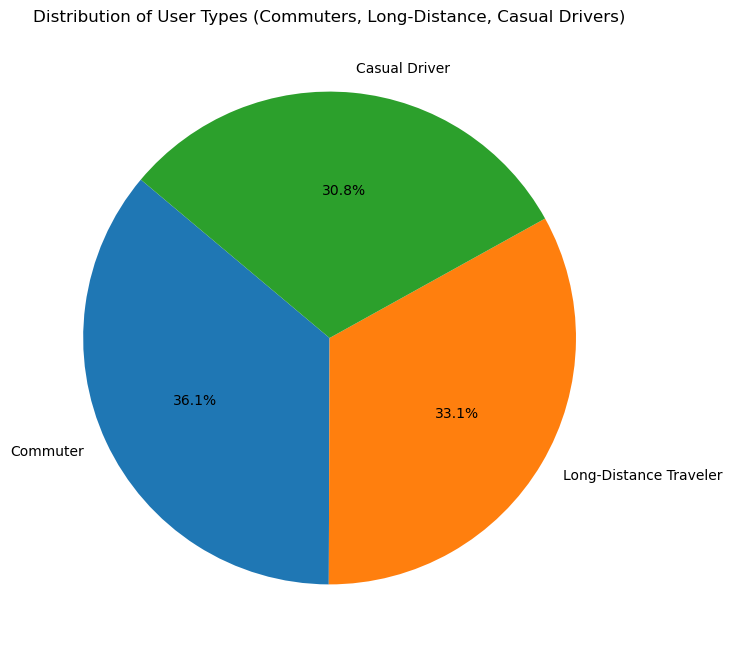

In [18]:
import matplotlib.pyplot as plt

# Load data into dataframe
df = pd.read_csv('ev_charging_patterns.csv')

# Pie Chart for User Types
user_types = df['User Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(user_types, labels=user_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of User Types (Commuters, Long-Distance, Casual Drivers)')
plt.show()

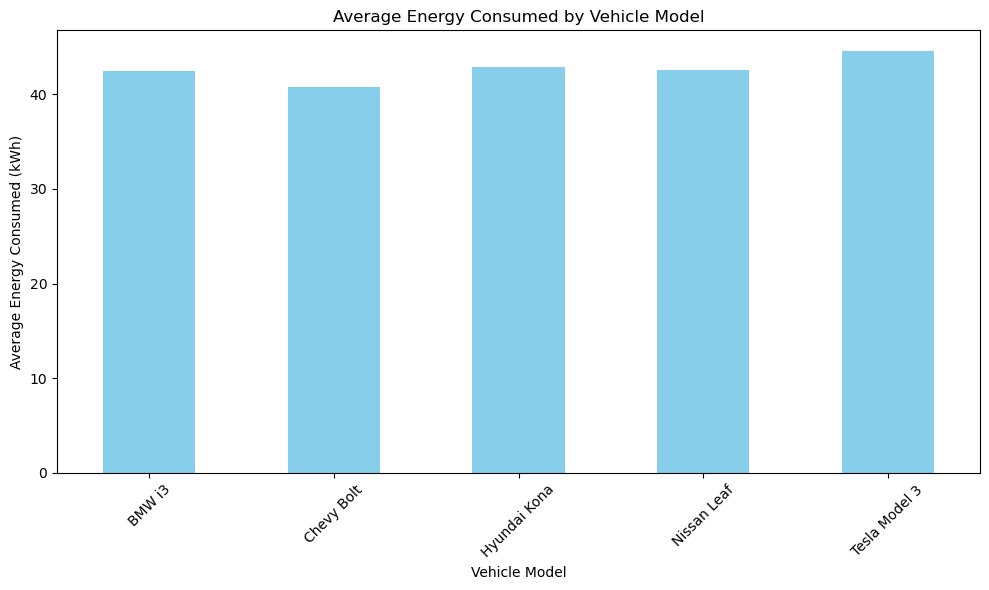

In [19]:
# Bar Chart for Average Energy Consumed by Vehicle Model
average_energy_by_model = df.groupby('Vehicle Model')['Energy Consumed (kWh)'].mean()
plt.figure(figsize=(10, 6))
average_energy_by_model.plot(kind='bar', color='skyblue')
plt.title('Average Energy Consumed by Vehicle Model')
plt.xlabel('Vehicle Model')
plt.ylabel('Average Energy Consumed (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

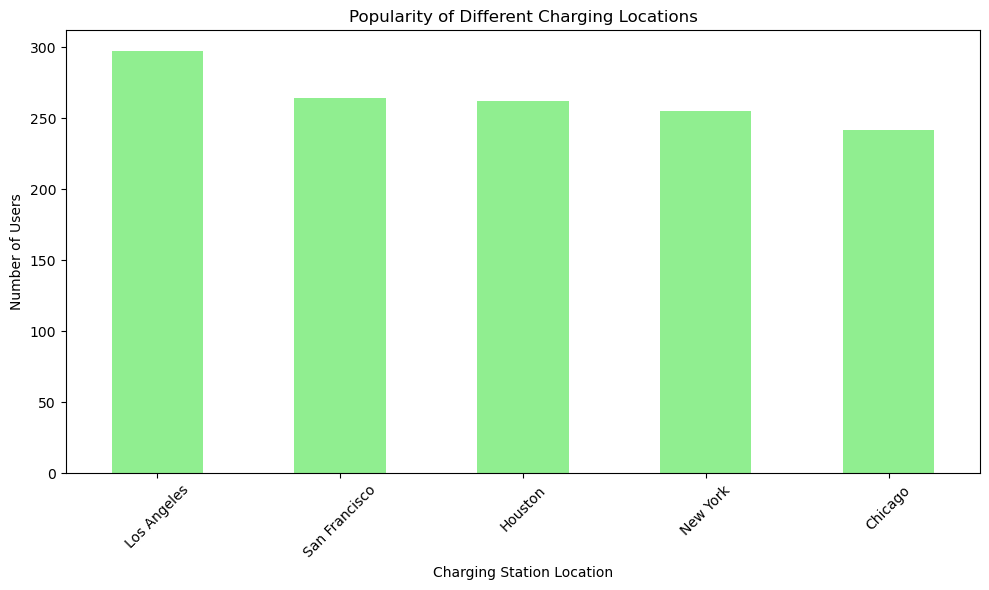

In [20]:
# Bar Chart for Popularity of Charging Locations
charging_locations = df['Charging Station Location'].value_counts()
plt.figure(figsize=(10, 6))
charging_locations.plot(kind='bar', color='lightgreen')
plt.title('Popularity of Different Charging Locations')
plt.xlabel('Charging Station Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


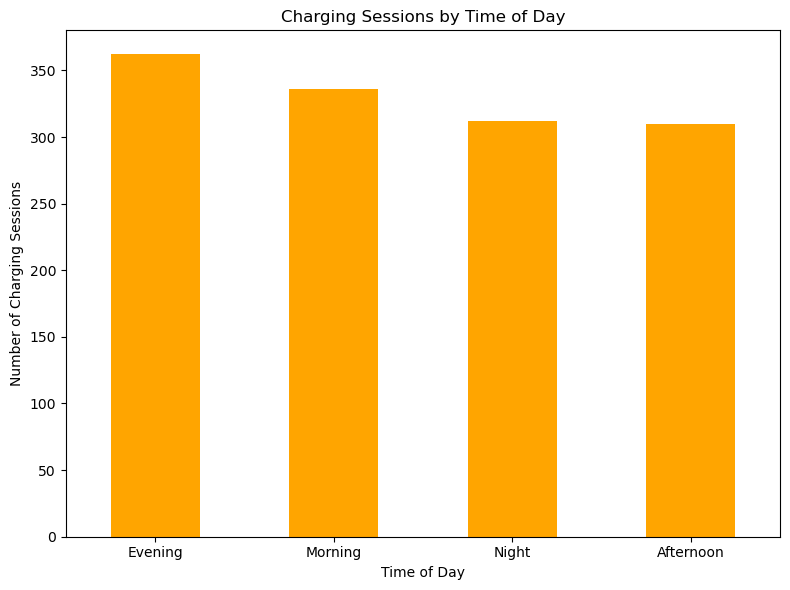

In [21]:
# Bar Chart for Charging Sessions by Time of Day
time_of_day = df['Time of Day'].value_counts()
plt.figure(figsize=(8, 6))
time_of_day.plot(kind='bar', color='orange')
plt.title('Charging Sessions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Charging Sessions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

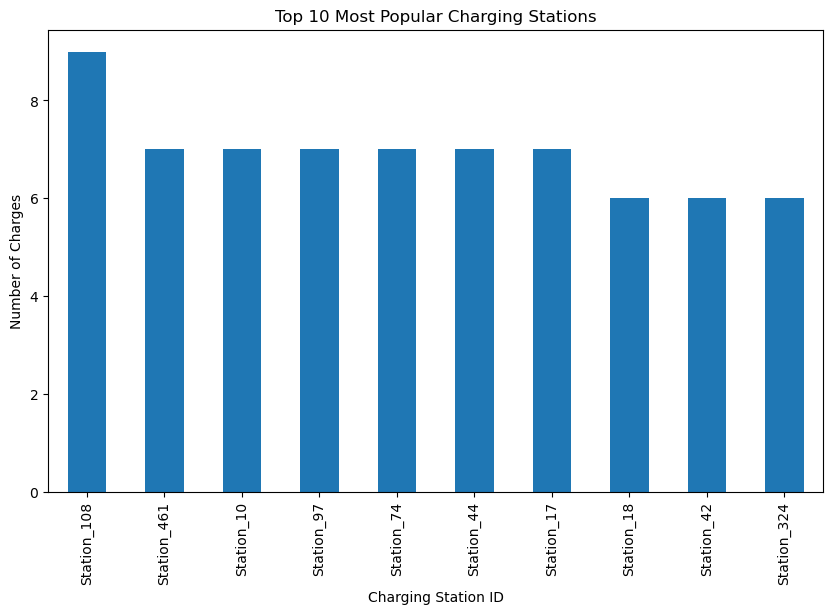

In [22]:
# Charging station usage trends
station_usage = df.groupby('Charging Station ID')['Charging Duration (hours)'].count().sort_values(ascending=False)

# Plot top 10 most popular stations
station_usage.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Popular Charging Stations')
plt.xlabel('Charging Station ID')
plt.ylabel('Number of Charges')
plt.show()

In [ ]:
# Convert the 'Charging Start Time' column to datetime if not already in datetime format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'], errors='coerce')

# Grouping the data by day and summing up the energy consumed
charge_consumed_by_day = df.groupby(df['Charging Start Time'].dt.date)['Energy Consumed (kWh)'].sum()

# Plotting the data as a line chart
plt.figure(figsize=(12, 6))
plt.plot(charge_consumed_by_day.index, charge_consumed_by_day.values, marker='o', linestyle='-', alpha=0.8)

# Customizing the plot
plt.title("Charge Consumed by All Users Grouped by Day", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Energy Consumed (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

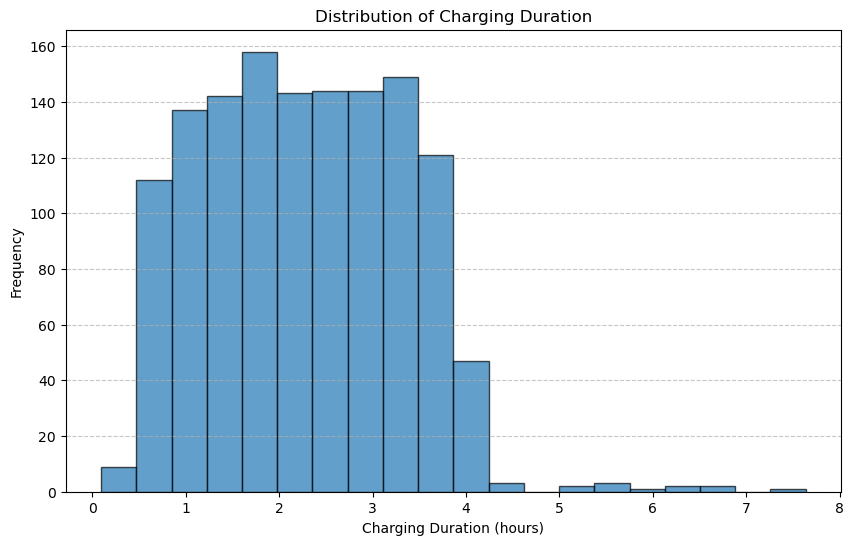

In [24]:
df['Charging Duration (hours)'].plot(kind='hist', bins=20, alpha=0.7, edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Charging Duration')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


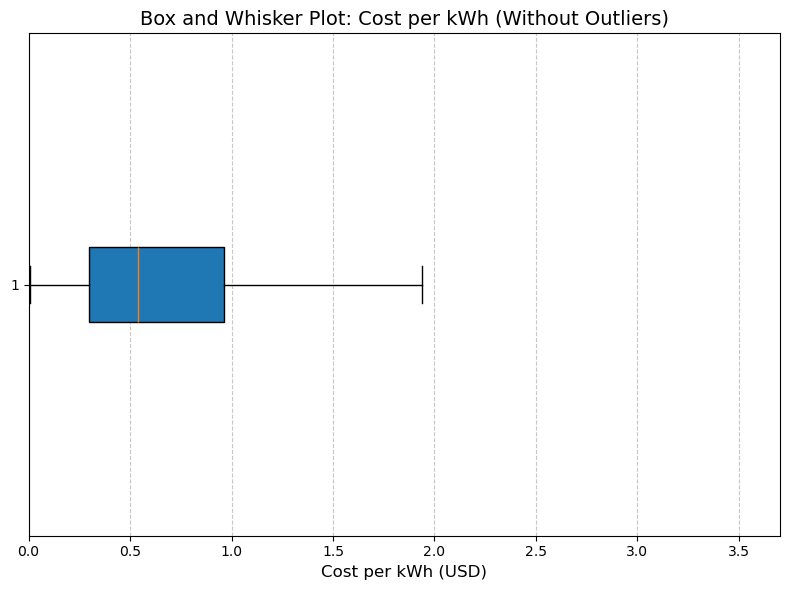

In [25]:

if 'Cost per kWh' not in df.columns:
    df['Cost per kWh'] = df['Charging Cost (USD)'] / df['Energy Consumed (kWh)']


plt.figure(figsize=(8, 6))
plt.boxplot(
    df['Cost per kWh'].dropna(),
    vert=False,
    patch_artist=True,
    showfliers=False  # Hide the outliers (fliers)
)

# Customizing the plot with adjusted x-axis limits
plt.xlim(0, df['Cost per kWh'].quantile(0.95) * 1.2)  # Extend up to 120% of the 95th percentile

plt.title("Box and Whisker Plot: Cost per kWh (Without Outliers)", fontsize=14)
plt.xlabel("Cost per kWh (USD)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


2. ML Component(s)

Linear Regression Model that leverages vehicle model, time of day, charger type, and user type to predict the energy consumed

In [26]:
# One hot encoding
df["BMW i3"] = (df["Vehicle Model"] == "BMW i3").astype(int)
df["Hyundai Kona"] = (df["Vehicle Model"] == "Hyundai Kona").astype(int)
df["Chevy Bolt"] = (df["Vehicle Model"] == "Chevy Bolt").astype(int)
df["Nissan Leaf"] = (df["Vehicle Model"] == "Chevy Bolt").astype(int)
df["Tesla Model 3"] = (df["Vehicle Model"] == "Chevy Bolt").astype(int)

df["Morning"] = (df["Time of Day"] == "Morning").astype(int)
df["Afternoon"] = (df["Time of Day"] == "Afternoon").astype(int)
df["Evening"] = (df["Time of Day"] == "Evening").astype(int)
df["Night"] = (df["Time of Day"] == "Night").astype(int)

df["Level 1"] = (df["Charger Type"] == "Level 1").astype(int)
df["Level 2"] = (df["Charger Type"] == "Level 2").astype(int)
df["DC Fast Charger"] = (df["Charger Type"] == "DC Fast Charger").astype(int)

df["Commuter"] = (df["User Type"] == "Commuter").astype(int)
df["Casual Driver"] = (df["User Type"] == "Casual Driver").astype(int)
df["Long-Distance Traveler"] = (df["User Type"] == "Long-Distance Traveler").astype(int)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import io

newFrame = df[['BMW i3', 'Hyundai Kona','Chevy Bolt','Nissan Leaf','Tesla Model 3','Morning','Afternoon','Evening','Night','Level 1','Level 2','DC Fast Charger','Commuter','Casual Driver','Long-Distance Traveler','Energy Consumed (kWh)']]
newFrame = newFrame.dropna(subset=['Energy Consumed (kWh)'])

# Preprocess data
X = newFrame[['BMW i3', 'Hyundai Kona','Chevy Bolt','Nissan Leaf','Tesla Model 3','Morning','Afternoon','Evening','Night','Level 1','Level 2','DC Fast Charger','Commuter','Casual Driver','Long-Distance Traveler']]
y = newFrame['Energy Consumed (kWh)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Take user inputs
vehicle_type = input("Enter the vehicle type (e.g., BMW i3, Hyundai Kona, Chevy Bolt, Nissan Leaf, Tesla Model 3): ")
charger_type = input("Enter the charger type (Level 1, Level 2, DC Fast Charger): ")
time_of_day = input("Enter the time of day (Morning, Afternoon, Evening, Night): ")
user_type = input("Enter the user type (Commuter, Casual Driver, Long-Distance Traveler): ")
    
test_data = []
    
    # Create a row for each test case
row = {
    'BMW i3': 1 if vehicle_type == 'BMW i3' else 0,
    'Hyundai Kona': 1 if vehicle_type == 'Hyundai Kona' else 0,
    'Chevy Bolt': 1 if vehicle_type == 'Chevy Bolt' else 0,
    'Nissan Leaf': 1 if vehicle_type == 'Nissan Leaf' else 0,
    'Tesla Model 3': 1 if vehicle_type == 'Tesla Model 3' else 0,

    'Morning': 1 if time_of_day == 'Morning' else 0,
    'Afternoon': 1 if time_of_day == 'Afternoon' else 0,
    'Evening': 1 if time_of_day == 'Evening' else 0,
    'Night': 1 if time_of_day == 'Night' else 0,
    
    'Level 1': 1 if charger_type == 'Level 1' else 0,
    'Level 2': 1 if charger_type == 'Level 2' else 0,
    'DC Fast Charger': 1 if charger_type == 'DC Fast Charger' else 0,
        
    'Commuter': 1 if user_type == 'Commuter' else 0,
    'Casual Driver': 1 if user_type == 'Casual Driver' else 0,
    'Long-Distance Traveler': 1 if user_type == 'Long-Distance Traveler' else 0,

    }
test_data.append(row)
    
# Convert to DataFrame
test_df= pd.DataFrame(test_data)

# Step 3: Use the trained model to predict the energy consumed for the user test case
y_test_pred = model.predict(test_df)

print("Predicted Energy Consumed (kWh)", y_test_pred[0])

Enter the vehicle type (e.g., BMW i3, Hyundai Kona, Chevy Bolt, Nissan Leaf, Tesla Model 3):  BMW i3
Enter the charger type (Level 1, Level 2, DC Fast Charger):  Level 1
Enter the time of day (Morning, Afternoon, Evening, Night):  Evening
Enter the user type (Commuter, Casual Driver, Long-Distance Traveler):  Casual Driver


Predicted Energy Consumed (kWh) 45.5


In [29]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Model Coefficients:", model.coef_)

Model Coefficients: [-2.54111710e+00 -7.11561237e-01 -5.31127554e+13 -1.88835238e+12
  5.50011078e+13  3.19058854e+14  3.19058854e+14  3.19058854e+14
  3.19058854e+14 -1.04089574e+15 -1.04089574e+15 -1.04089574e+15
 -5.78364906e+14 -5.78364906e+14 -5.78364906e+14]


In [30]:
print("Model Intercept:", model.intercept_)
print("This is the predicted Energy Consumed when all features are zero.","\n")

Model Intercept: 1300201794522461.5
This is the predicted Energy Consumed when all features are zero. 



In [31]:
print("Mean Squared Error:", mse)
print("MSE = 458.62 means that, on average, the squared error (difference between the actual and predicted values) is 458.62 units squared. This indicates poor model performance.","\n")

Mean Squared Error: 458.6283880499327
MSE = 458.62 means that, on average, the squared error (difference between the actual and predicted values) is 458.62 units squared. This indicates poor model performance. 



In [32]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")
print("This is the coefficient of determination, -0.012 R^2 value means that the model is underfitting the data and the model is a poor fit in general. It means that the model performs worse than a simple horizontal line (mean of the data) would in predicting the outcomes. ")


R² Score: -0.012890860189809228
This is the coefficient of determination, -0.012 R^2 value means that the model is underfitting the data and the model is a poor fit in general. It means that the model performs worse than a simple horizontal line (mean of the data) would in predicting the outcomes. 


Machine Learning Component: 
We know that the elbow curve helps identify the optimal number of clusters to use for K-Means clustering.

Inertia: This measures the sum of squared distances between each point and the center of its cluster. Lower values indicate tighter clustering.

Elbow Point: The point where the rate of decrease in inertia slows down significantly. It looks like an "elbow" in the graph. 

We see elbow point at k=4 in our graph below.

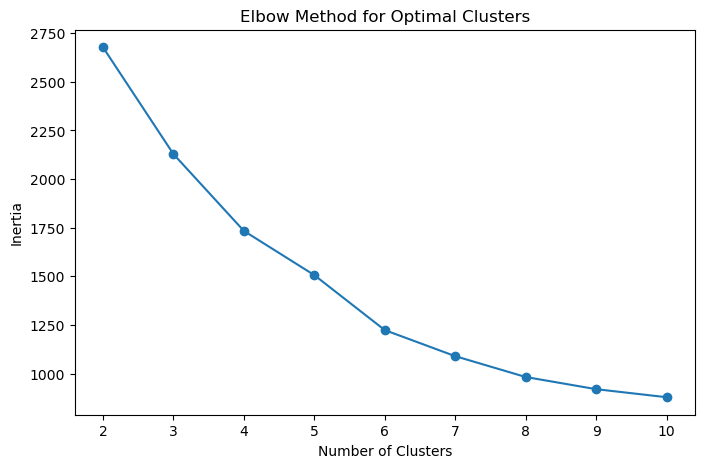

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

features = df[['Charging Duration (hours)', 'Energy Consumed (kWh)', 'Distance Driven (since last charge) (km)']]

# handle missing values (if any) by dropping rows with missing data
features = features.dropna()

# standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
clusters = range(2, 11)
inertia = []
for a in range_clusters:
    kmeans = KMeans(n_clusters=a, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()